## Quick Start Examples


### Knapsack Instance

In the following examples, we will use the item list, weights, values, and weight limits given as follows. These values are taken from the problem statement in [RossettaCode Knapsack: 0-1](https://rosettacode.org/wiki/Knapsack_problem/0-1)

In [206]:
import mpmath as mp
mp.dps = 30; mp.pretty = True
print(float(mp.findroot(mp.sin, 3)))

3.141592653589793


In [289]:
np.exp(800)

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/2509924834.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(800)


inf

In [294]:
mp.exp(900)+mp.exp(900)

mpf('1.4657628444614842e+391')

In [314]:
mp_exp_array(-np.array([10,20])*mp.log(0.001))

array([mpf('9.9999999999999763e+29'), mpf('9.9999999999999531e+59')],
      dtype=object)

In [299]:
mp_exp_array = np.frompyfunc(mp.exp, 1, 1)
mp_z_array = np.

In [312]:
mp_exp_array(np.array([10,10,10]))*np.array([1,2,3])

array([mpf('22026.465794806718'), mpf('44052.931589613436'),
       mpf('66079.397384420154')], dtype=object)

In [1307]:
# deriv_potential = lambda z, T, weights, values, limit: -limit/z+ 1/(1-z) + (1/z)*np.sum(weights/(mp_exp_array(-values/T)*mp_exp_array(-weights*mp.log(z)) + 1))   

In [1315]:
# z0 = 0.25
# deriv_potential(z0, T0, weight_vec, value_vec, Wlimit)
# deltaz = 1e-7
# for k in range(int(1e13)):
#     z0 = z0-deriv_potential(z0, T0, weight_vec, value_vec, Wlimit)
# print(z0)

KeyboardInterrupt: 

In [1313]:
T0

0.1

In [439]:
test_constraint = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights/(mp_exp_array(-values/T)*mp_exp_array(-weights*mp.log(z)) + 1))   

In [1097]:
test_constraint_deriv = lambda z, T, weights, values, limit: 1/(1-z)**2 + np.sum(weights**2*mp_exp_array(-(weights+1)*mp.log(z))*mp_exp_array(-values/T)/(mp_exp_array(-values/T)*mp_exp_array(-weights*mp.log(z)) + 1)**2)   

In [1100]:
test_constraint_deriv(z0, T0, weight_vec, value_vec, Wlimit)

mpc(real='1.2014768464178407e-4685113255847602394141246519210', imag='-5.8447586216225187e-4685113255847602394141246519215')

In [1107]:
z0 = 0.15
for k in range(100):
    zf = z0 - test_constraint(z0, T0, weight_vec, value_vec, Wlimit)/test_constraint_deriv(z0, T0, weight_vec, value_vec, Wlimit)
    z0 = zf
np.sign(zf.real)

-1

In [1112]:
a = 1e-9
b = 1-1e-9
c = (a+b)/2
for k in range(30):
    f_a = test_constraint(a, T0, weight_vec, value_vec, Wlimit).real
    f_b = test_constraint(b, T0, weight_vec, value_vec, Wlimit).real
    f_c = test_constraint(c, T0, weight_vec, value_vec, Wlimit).real
    
    if np.sign(f_a) == -np.sign(f_c):
        b = c
        c = (a+b)/2
        
    elif np.sign(f_b) == -np.sign(f_c):  
        a = c
        c = (a+b)/2

c

0.7300991853753718

In [1113]:
def find_root_bijection(func, num_bijections = 20, **args):

    """
    Finds the root of a function in the domain (0, 1) by 
    the bijection method

    Parameters
    ----------
    func : function
        Function for which we are seeking the root
        
    num_powers : int
        Number of powers of 10 to include in final answer

    Returns
    ----------
    fin_z : float
        Value of critical point

    error : float 
        How far function is from zero at this critical point

    """        
    
    a = 1e-9
    b = 1-1e-9
    c = (a+b)/2

    for k in range(num_bijections):
        f_a = func(a, **args).real
        f_b = func(b, **args).real
        f_c = func(c, **args).real

        if np.sign(f_a) == -np.sign(f_c):
            b = c
            c = (a+b)/2

        elif np.sign(f_b) == -np.sign(f_c):  
            a = c
            c = (a+b)/2

    fin_z = c
    error = func(c, **args).real

    return fin_z, error  

In [1438]:
T0 = 1.0
start_time = time.time()

zval, _ = find_root_bijection(test_constraint, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))
zval

Elapsed Time: 0.003326 secs


/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/597087447.py:3: RuntimeWarning: overflow encountered in exp
  test_constraint = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights/(np.exp(-values/T)*np.exp(-weights*np.log(z)) + 1))


0.27536344573125554

In [ ]:
dec_exp_array = lambda array: np.array([DC(elem).exp() for elem in array])

dec_log_array = lambda array: np.array([DC(elem).ln() for elem in array])

dec_array = lambda array: np.array([DC(elem) for elem in array])

In [1430]:
test_constraint_mp = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights/(mp_exp_array(-values/T)*mp_exp_array(-weights*mp.log(z)) + 1))   

test_constraint_np = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights*np.exp(weights*np.log(z))/(np.exp(-values/T)+np.exp(weights*np.log(z)) ))   

test_constraint_dec = lambda z, T, weights, values, limit:  -DC(limit)+ DC(z/(1-z)) + np.sum(dec_array(weights)/(dec_exp_array(-values/T)*dec_exp_array(-dec_array(weights)*DC(z).ln()) + 1))   





In [1428]:
float(z0.real)

0.038789908819153646

In [1436]:
test_constraint_dec(float(z0.real), T0, weight_vec, value_vec, Wlimit)

True

In [1432]:
test_constraint_mp(float(z0.real), T0, weight_vec, value_vec, Wlimit)

mpf('300.79002212086471')

In [1414]:
!pip install decimal
import decimal
from decimal import Decimal as DC



ERROR: Could not find a version that satisfies the requirement decimal (from versions: none)
ERROR: No matching distribution found for decimal

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: pip install --upgrade pip


In [1400]:
decimal.Decimal(math.exp(1))*np.ones(4)

TypeError: unsupported operand type(s) for *: 'decimal.Decimal' and 'float'

In [1406]:
Decimal(4.5).exp()

Decimal('90.01713130052181355011545675')

In [1387]:
np.array([decimal.Decimal(math.exp(1))**(2), decimal.Decimal(math.exp(1))**(3)])

array([Decimal('7.389056098930649441295292229'),
       Decimal('20.08553692318766453633873498')], dtype=object)

In [1415]:


# dec_exp_array = lambda array: np.array([decimal.Decimal(math.exp(1))**(decimal.Decimal(elem)) for elem in array])

In [1416]:
dec_array(weight_vec)

array([Decimal('9'), Decimal('13'), Decimal('153'), Decimal('50'),
       Decimal('15'), Decimal('68'), Decimal('27'), Decimal('39'),
       Decimal('23'), Decimal('52'), Decimal('11'), Decimal('32'),
       Decimal('24'), Decimal('48'), Decimal('73'), Decimal('42'),
       Decimal('43'), Decimal('22'), Decimal('7'), Decimal('18'),
       Decimal('4'), Decimal('30')], dtype=object)

In [1398]:
dec_exp_array(weight_vec)

array([Decimal('8103.083927575380129238613181'),
       Decimal('442413.3920089201974543569483'),
       Decimal('2.799340524267474290409678314E+66'),
       Decimal('5184705528587058677339.233433'),
       Decimal('3269017.372472108031490136971'),
       Decimal('3.404276049931728210147415526E+29'),
       Decimal('532048240601.7978527028132809'),
       Decimal('86593400423993567.34913489426'),
       Decimal('9744803446.248890680242972485'),
       Decimal('38310080007165662547137.43615'),
       Decimal('59874.14171519778342858549254'),
       Decimal('78962960182680.56077896449663'),
       Decimal('26489122129.84343848403161196'),
       Decimal('701673591209761382665.3353592'),
       Decimal('5.052393630276084579580909733E+31'),
       Decimal('1739274941520497162.446099321'),
       Decimal('4727839468229335749.651581355'),
       Decimal('3584912846.131587367289051844'),
       Decimal('1096.633158428458191012813295'),
       Decimal('65659969.13733044828362824073'),
       D

In [1396]:
decimal.Decimal(np.exp(1))**(decimal.Decimal([2.1, 2.1, 2.1]))

ValueError: sign must be an integer with the value 0 or 1

In [1374]:
dec_exp = lambda x: decimal.Decimal(math.exp(1))**(x)

In [1381]:
decimal.Decimal(np.exp([1,2]))

TypeError: conversion from numpy.ndarray to Decimal is not supported

In [1375]:
dec_exp_array = np.frompyfunc(dec_exp, 1, 1)

In [1376]:
dec_exp_array(weight_vec)

TypeError: unsupported operand type(s) for ** or pow(): 'decimal.Decimal' and 'float'

### Finding Root

In [1457]:
start_time = time.time()

zval, _ = find_root(test_constraint_mp, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit, num_powers =20)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))
zval

Elapsed Time: 0.060608 secs


0.2753630407012555

In [1458]:
start_time = time.time()

zval, _ = find_root(test_constraint_np, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit, num_powers =20)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))
zval

Elapsed Time: 0.007787 secs


/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/3076663006.py:3: RuntimeWarning: divide by zero encountered in log
  test_constraint_np = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights*np.exp(weights*np.log(z))/(np.exp(-values/T)+np.exp(weights*np.log(z)) ))


0.27536304070125545

In [1459]:
start_time = time.time()

zval, _ = find_root(test_constraint_dec, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit, num_powers =10)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))
zval

Elapsed Time: 0.049923 secs


0.2753630407

### Evaluating Function

In [1460]:
start_time = time.time()

test_constraint_dec(float(z0.real), T0, weight_vec, value_vec, Wlimit)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))

Elapsed Time: 0.003908 secs


In [1461]:
start_time = time.time()

test_constraint_mp(float(z0.real), T0, weight_vec, value_vec, Wlimit)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))

Elapsed Time: 0.003543 secs


In [1462]:
start_time = time.time()

test_constraint_np(float(z0.real), T0, weight_vec, value_vec, Wlimit)

print('Elapsed Time: {:2f} secs'.format( time.time()-start_time))

Elapsed Time: 0.000432 secs


In [702]:
T0 =.10
z0 = 0.0000022
second_constraint = lambda z: test_constraint(z, T0, weight_vec, value_vec, Wlimit)
second_constraint(z0)
# z1 = .00000002
# mp.findroot(second_constraint, z1, tol = 1e-3)

mpf('9.4865683984655789')

In [912]:
T0 =.10
z0 = 0.000002146919165813740290
float(test_constraint(z0, T0, weight_vec, value_vec, Wlimit))

6.821210263296962e-13

In [962]:
T0 = 1.0
z0 = 0.3
float(test_constraint(z0, T0, weight_vec, value_vec, Wlimit))

17.393688032765965

In [ ]:
### np.log(z0)

In [909]:
mp.dps = 50

In [713]:
current_z = np.dot(coeffs, powers_10)

0.0

In [720]:
for k in range(0,10, 1)[::-1]:
    print(k)

9
8
7
6
5
4
3
2
1
0


In [722]:
T0

0.1

In [727]:
test_constraint(current_z, T0, weight_vec, value_vec, Wlimit).real>0

True

In [925]:
np.arange(0.1, 0.2, 0.01)

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [991]:
def test_function(func, **args):
    return func(0.1, **args)

In [992]:
test_function(test_constraint, T=1.0, weights=weight_vec, values=value_vec, limit=Wlimit)

mpf('-266.34432600312721')

In [993]:
test_constraint(0.1, T=1.0, weights=weight_vec, values=value_vec, limit=Wlimit)

mpf('-266.34432600312721')

In [1023]:
def find_root(func, num_powers = 20, **args):
    
    """
    Finds the root of a function in the domain (0, 1) exclusive

    Parameters
    ----------
    func : function
        Function for which we are seeking the root
        
    num_powers : int
        Number of powers of 10 to include in final answer

    Returns
    ----------
    fin_z : float
        Value of critical point

    error : float 
        How far function is from zero at this critical point

    """    
    
    powers_10 = np.array([10**(-k) for k in range(num_powers+1)])
    coeffs = np.zeros_like(powers_10)
    coeffs[0] = 0

    # determining initial order of current z
    for i in range(1, num_powers+1):
        coeffs[i] = 1
        current_z =  np.dot(coeffs, powers_10)
        current_sign = np.sign(func(current_z, **args).real)
        # reset coeffs if sign doesn't change
        if current_sign > 0:
            coeffs[i] = 0
        else:
            l_start = i
            break
            
    # determine subsequent coefficients
    for k in range(l_start,num_powers+1):

        # marching up
        for j in range(10):

            # try a value of the coefficient
            coeffs[k] = j
            new_z = np.dot(coeffs, powers_10)
            new_sign = np.sign(func(new_z,**args).real)  

            # if the sign has changed from the current sign, go to previous value
            if new_sign > 0:
                coeffs[k] = j-1 # set to the j value before the change
                current_z = np.dot(coeffs, powers_10)
                break

    # final z value
    fin_z = np.dot(coeffs, powers_10)    
    
    # error 
    error = func(fin_z, **args).real
    
    return fin_z, float(error)

In [1050]:
T0_vals = np.arange(0.1, 4.0, 0.01)
gamma_vals = np.zeros_like(T0_vals)

for m in range(len(gamma_vals)):
    T0 = T0_vals[m]
    z_res, _ = find_root(test_constraint, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit)
    gamma_vals[m] = -np.log(z_res)*T0

In [1135]:
x1= 0.1
y1 =  -x1*np.log(find_root_bijection(test_constraint, T=x1, weights=weight_vec, values=value_vec, limit=Wlimit)[0])

x2 = 0.12
y2 = -x2*np.log(find_root_bijection(test_constraint, T=x2, weights=weight_vec, values=value_vec, limit=Wlimit)[0])

m = (y2-y1)/(x2-x1)

linear_func = lambda x: m*(x-x1) + y1

In [1136]:
linear_func(0)

1.2322548977481855

In [1072]:
test_constraint = lambda z, T, weights, values, limit: -limit+ z/(1-z) + np.sum(weights/(mp_exp_array(-values/T)*mp_exp_array(-weights*mp.log(z)) + 1))   

In [1188]:
def gamma_calc(weights, values, limit):
    
    T1, T2 = 0.1, 0.35
    z1, _ = find_root(test_constraint, T=T1, weights=weights, values=values, limit=limit)
    z2, _ = find_root(test_constraint, T=T2, weights=weights, values=values, limit=limit)

    # calculating y values
    y1 =  -T1*np.log(z1)
    y2 =  -T2*np.log(z2)

    # calculating slope
    m = (y2-y1)/(T2-T1)

    # computing y intercept
    return -m*T1 + y1
  

In [1189]:
gamma_calc(weights=weight_vec, values=value_vec, limit=Wlimit)

1.3068835492236306

In [1200]:
def gamma_calc(weights, values, limit):
    
    T1, T2 = 0.05, 0.06
    z1, _ = find_root(test_constraint, T=T1, weights=weights, values=values, limit=limit)
    z2, _ = find_root(test_constraint, T=T2, weights=weights, values=values, limit=limit)

    # computing y intercept
    return T2*T1/(T2-T1)*np.log(z2/z1)
#     return (T2-T1)*np.log(z2)*np.log(z1)/np.log(z2/z1)
#     return -T1*np.log(z1)
  

In [1201]:
gamma_calc(weights=weight_vec, values=value_vec, limit=Wlimit)

1.306704168047351

In [1161]:
30/23

1.3043478260869565

In [1060]:
linear_func(0)

1.3068929981638986

In [1057]:
(y2-y1)/(x2-x1)

-0.017356769998770886

In [1204]:
from tqdm.notebook import tqdm

T0_vals = np.arange(0.1, 10.0, 0.01)
gamma_vals = np.zeros_like(T0_vals)

for m in tqdm(range(len(gamma_vals))):
    T0 = T0_vals[m]
    z_res, _ = find_root(test_constraint, T=T0, weights=weight_vec, values=value_vec, limit=Wlimit)
    gamma_vals[m] = -np.log(z_res)*T0

  0%|          | 0/990 [00:00<?, ?it/s]

In [1215]:
# equation for linear approximation
x1= 0.1
y1 =  -x1*np.log(find_root(test_constraint, T=x1, weights=weight_vec, values=value_vec, limit=Wlimit)[0])

x2 = 0.12
y2 = -x2*np.log(find_root(test_constraint, T=x2, weights=weight_vec, values=value_vec, limit=Wlimit)[0])

m = (y2-y1)/(x2-x1)

linear_func = lambda x: m*(x-x1) + y1

In [1302]:
idx = np.argmin(value_vec/weight_vec - linear_func(0))


9

In [1286]:
### Plot Example
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

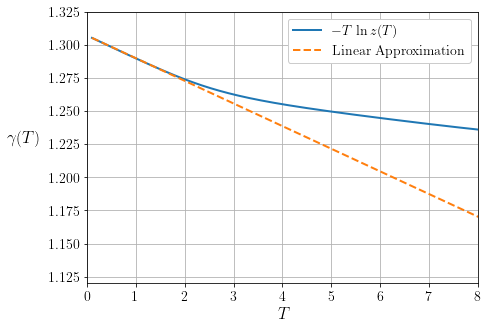

In [1300]:
plt.figure(figsize = (7,5))
plt.plot(T0_vals, gamma_vals, linewidth = 2, label = r'$-T\,\ln z(T)$')
plt.plot(T0_vals, linear_func(T0_vals),  linestyle = '--', linewidth = 2, label = 'Linear Approximation')
plt.xlabel(r'$T$', fontsize = 17)
plt.ylabel(r'$\gamma(T)$', fontsize = 17, rotation =0, labelpad = 25.0)
plt.xlim(0,8)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
# plt.axhline(y = linear_func(0), color = 'k', linestyle ='--', linewidth = 0.75, label = r'$\gamma_0$')
plt.ylim(1.12, 1.325)
plt.grid(alpha = 1)
plt.legend(loc = 'best', fontsize = 14, framealpha = 1)
plt.savefig('/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/2020_largeN_knapsack_problem/LaTeX_Scientific_reports/linear_comparison.png', dpi = 600, bbox_inches='tight' )
plt.show()

In [1036]:
np.log(find_root(test_constraint, T=0.15, weights=weight_vec, values=value_vec, limit=Wlimit)[0])

-8.695263217760553

In [ ]:
find_root()

In [1046]:

T0 = 0.15

T0_vals = np.arange(0.05, 4.0, 0.05)
gamma_vals = np.zeros_like(T0_vals)

for m in range(len(gamma_vals)):
    T0 = T0_vals[m]
    num_powers = 20
    powers_10 = np.array([10**(-k) for k in range(num_powers+1)])
    coeffs = np.zeros_like(powers_10)
    coeffs[0] = 0

    # determining initial order of current z
    for i in range(1, num_powers+1):
        coeffs[i] = 1
        current_z =  np.dot(coeffs, powers_10)
        current_sign = np.sign(test_constraint(current_z, T0, weight_vec, value_vec, Wlimit).real)

        # reset coeffs if sign doesn't change
        if current_sign > 0:
            coeffs[i] = 0
        else:
            l_start = i
            break

    # determine subsequent coefficients
    for k in range(l_start,num_powers):

        # if sign is positive, march down; if sign is negative, march up
        for j in range(10):

            # try a value of the coefficient
            coeffs[k] = j
            new_z = np.dot(coeffs, powers_10)
            new_sign = np.sign(test_constraint(new_z, T0, weight_vec, value_vec, Wlimit).real)  

            # if the sign has changed from the current sign, go to previous value
            if new_sign > 0:
                coeffs[k] = j-1 # set to the j value before the change
                current_z = np.dot(coeffs, powers_10)
                break

    z_res = np.dot(coeffs, powers_10)
    test_constraint(z_res, T0, weight_vec, value_vec, Wlimit)
    print('Temperature val:', T0)
    print('z val:', z_res)
    print('Gamma val:', -np.log(z_res)*T0)
    print()
    gamma_vals[m] = -np.log(z_res)*T0 

Temperature val: 0.05
z val: 4.5353562e-12
Gamma val: 1.3059558745396609

Temperature val: 0.1
z val: 2.1469191658137e-06
Gamma val: 1.3051476689607004

Temperature val: 0.15000000000000002
z val: 0.0001673767635044907
Gamma val: 1.3042894826640832

Temperature val: 0.2
z val: 0.0014779367956205876
Gamma val: 1.3034216441641444

Temperature val: 0.25
z val: 0.005460565694852365
Gamma val: 1.3025507218690882

Temperature val: 0.3
z val: 0.0130504805714084
Gamma val: 1.301679096148858

Temperature val: 0.35000000000000003
z val: 0.024316644721589353
Gamma val: 1.3008079683033689

Temperature val: 0.4
z val: 0.03878021511315225
Gamma val: 1.2999380328681291

Temperature val: 0.45
z val: 0.055753137547930084
Gamma val: 1.2990697161024907

Temperature val: 0.5
z val: 0.07454095467262639
Gamma val: 1.298203288745946

Temperature val: 0.55
z val: 0.09453377987245529
Gamma val: 1.2973389271633424

Temperature val: 0.6000000000000001
z val: 0.11523352225320446
Gamma val: 1.2964767487613729

Tem

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

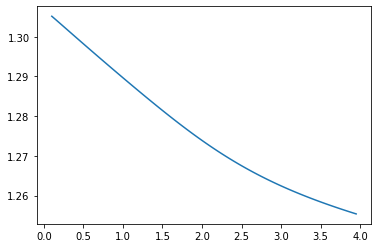

In [1045]:
plt.plot(T0_vals, gamma_vals)
plt.grid

In [885]:
len(coeffs)

23

In [704]:
z1 = 0.9
test_constraint(z1, T0, weight_vec, value_vec, Wlimit)

mpf('412.0')

In [701]:

for k in range(1, 11):
    z0 = 10**(-k)
    value = second_constraint(z0)
    if value < 0:
        zold = z0
        print(zold)
        break
print()        
for j in range(1, 11):
    znew = zold*j
    value = second_constraint(znew)
    
    if value >0:
        print(j)
        znew = zold*(j-1)
        print(znew)
        break
        
exponent = np.floor(np.log10(znew))
znew2 = znew + 10**(exponent-1)
print(znew2)

for i in range(1, 11):
    znew2 = znew + i*10**(-(exponent+1))
    print(znew2)
    value = second_constraint(znew2)
    
    if value >0:
        znew3 = znew + (i-1)*10**(-(exponent+1))
        print(znew3)
        break

1e-06

3
2e-06
2.1e-06
100000.000002
2e-06


In [629]:
T0 =.10
z0 = 0.00000214691916581
second_constraint = lambda z: test_constraint(z, T0, weight_vec, value_vec, Wlimit)
second_constraint(z0)
z1 = .00000002
mp.findroot(second_constraint, z1, tol = 1e-3)

ValueError: Could not find root within given tolerance. (161603.999999890937694 > 0.001)
Try another starting point or tweak arguments.

In [621]:
1/(mp_exp_array(-value_vec/T0)*mp_exp_array(-weight_vec*mp.log(z0)) + 1)

array([mpf('1.0'), mpf('1.0'), mpf('0.95787462026991399'), mpf('1.0'),
       mpf('1.0'), mpf('9.9079539956990466e-191'), mpf('1.0'),
       mpf('4.5562210779234951e-48'), mpf('0.45413830216978529'),
       mpf('4.8290780756824434e-252'), mpf('1.0'),
       mpf('8.0620733928812579e-52'), mpf('1.281589432784866e-71'),
       mpf('2.2730105684453014e-229'), mpf('8.71642407026163e-241'),
       mpf('1.0'), mpf('1.0'), mpf('1.0'), mpf('1.0'),
       mpf('1.2246734496491926e-50'), mpf('1.0'),
       mpf('2.4205774368687091e-127')], dtype=object)

In [ ]:
def root_finder(z_init = )

In [620]:
-T0*np.log(z0)

1.3051476689608728

In [541]:
30/23

1.3043478260869565

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/153577755.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [452]:
np.log(.100)

-2.3025850929940455

In [421]:
test_constraint(z0, T0,  weight_vec, value_vec, Wlimit)

mpf('-274.63602131782915')

In [422]:
z1 = .01
mp.findroot(second_constraint, z0)

mpc(real='0.10689599961536394', imag='9.0556790788267124e-71')

In [295]:
mp.log(900)

mpf('6.8023947633243109')

In [210]:
test_constraint = lambda z, weights, values, limit: limit+ z/(1-z) + mp.sum(weights*z**(weights)/(mp.exp(-values/T) +z**(weights)))   

In [211]:
partialFz = lambda z: test_constraint(z, weights= weight_vec, values=value_vec, limit= Wlimit)

In [219]:
import scipy
scipy.special.expm1(500)

1.4035922178528375e+217

In [215]:
np.exp(1000)

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/2006519253.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1000)


inf

In [212]:
mp.array

AttributeError: module 'mpmath' has no attribute 'array'

In [152]:
# defining instance
import numpy as np
from matplotlib import lines
import matplotlib.pyplot as plt
import copy
from scipy.optimize import fsolve, fmin
import math
from itertools import combinations


from KP import KnapsackProblem

In [169]:
import numpy as np
from matplotlib import lines
import matplotlib.pyplot as plt
import copy
from scipy.optimize import fsolve, fmin
import math
from itertools import combinations


def anycomb(items):
    ' return combinations of any length from the items '
    
    nvals = len(items)
    return ( comb
             for r in range(1, nvals+1)
             for comb in combinations(items, r)
             )
 
def totalvalue(comb, limit):
    ' Totalise a particular combination of items'
    totwt = totval = 0
    for item, wt, val in comb:
        totwt  += wt
        totval += val
    return (totval, -totwt) if totwt <= limit else (0, 0)


def x_selected(x_vals, w_vals, W):
    
    '''
    Selects the objects in decreasing order of 
    probability of occupancy until the weight limit is satisfied
    '''
    
    final_object_list = np.zeros_like(x_vals)
    for _ in range(len(x_vals)):
        new_final_object_list = copy.deepcopy(final_object_list)
        print(new_final_object_list)
        idx1 = np.argmax(x_vals)
        new_final_object_list[idx1] = 1
        x_vals[idx1] = 0
        if np.dot(w_vals, new_final_object_list) <= W:
            final_object_list = copy.deepcopy(new_final_object_list)
        else:
            break
            
    return final_object_list

def trans_knapsack(x, weights, limit): 

    '''
    Randomly selects an item from our possible list of items and removes 
    it or adds contingent on whether it is already in the knapsack. 
    If adding the item pushes the knapsack above the weight limit, 
    another item is randomly selected. 

    Parameters
    ----------
    x : array
        Vector representing the items in the pack

    weights : array
        Vector of weights for objects

    limit : float
        Maximum weight of knapsack

    Returns
    ----------
    x_new : array
        New vector respresenting items in knapsack
    '''
    
    # define new vector
    x_new = np.copy(x)
    
    # selects random integer between 0 and len(X)-1
    idx = np.random.randint(len(x))
    
    # removes or adds item idx
    x_new[idx] = np.abs(x_new[idx]-1)
    
    k = 0
    # repeats selection if we have exceeded weight limit
    while np.dot(x_new, weights) > limit: 
        # define new vector
        x_new = np.copy(x)

        # selects random integer between 0 and len(X)-1
        idx = np.random.randint(len(x))

        # removes or adds item idx
        x_new[idx] = np.abs(x_new[idx]-1)
        
        #increment k by 1
        k +=1 
        
        if k == 100:
            
            raise Exception('Maximum weight is too low to be satisfiable.')
    
    return x_new

class KnapsackProblem:
    
    def __init__(self, weights, values, limit, bounds = None):
        self.weights = weights
        self.values = values
        self.limit = limit
        self.bounds = bounds
        
        '''
        Note: For the unbounded knapsack problem we need to insert an 
        explicit definition of bounds as
        
        bounds = np.array([int(math.floor(W/w_elem)) for w_elem in weights])
        '''
        # number of weights must be the same as the number of values
        assert len(self.values) == len(self.weights)    
        
        # number of bounds must be same as number of values (if there are bounds)
        if self.bounds is not None:
            assert len(self.bounds) == len(self.values)   
        
    def __str__(self):
        if self.bounds is None:
            return str(f'<Knapsack Instance, \nWeights:{self.weights},\nValues:{self.values},\nLimit:{self.limit}>')
        else:
            return str(f'<Knapsack Instance, \nWeights:{self.weights},\nValues:{self.values},\nLimit:{self.limit},\nBounds:{self.bounds}>')
        
    def __repr__(self):
        if self.bounds is None:
            return str(f'<Knapsack Instance, \nWeights:{self.weights},\nValues:{self.values},\nLimit:{self.limit}>')
        else:
            return str(f'<Knapsack Instance, \nWeights:{self.weights},\nValues:{self.values},\nLimit:{self.limit},\nBounds:{self.bounds}>')
        
        
    #####
    # Large N Algorithms: Zero-One and Bounded
    #####        
        
    # defining function to produce average x
    def X_avg_zero_one(self, z = 0.095, T=1.0):

        """
        For the zero-one KP
        Computes the average occupancy for each object given 
        the solution to the steepest descent condition, model parameters
        (weights, values) and model hyperparameter (T)

        Parameters
        ----------
        z : float
            Solution to steepest descent condition

        weights : array
            Vector of weights for objects

        values : array
            Vector of values for objects

        T : float
            Temperature for statistical physics system

        Returns
        ----------
        xvec : array
            Vector of average occupancies
        """    

        nvals = len(self.weights)

        # empty vector 
        xvec = np.zeros(nvals) 

        # filling in averages
        for k in range(nvals):

            xvec[k] = np.exp(self.values[k]/T)/(z**(-self.weights[k]) + np.exp(self.values[k]/T))

        return xvec
    
    # defining function to produce average x
    def X_avg_bounded(self, z, T):

        """
        For the bounded KP
        Computes the average occupancy for each object given 
        the solution to the steepest descent condition, model parameters
        (weights, values, C) and model hyperparameter (T)

        Parameters
        ----------
        z : float
            Solution to steepest descent condition

        T : float
            Temperature for statistical physics system

        Returns
        ----------
        xvec : array
            Vector of average occupancies
        """    
        
        if self.bounds is None:
            return 'Not a Bounded Knapsack Problem'

        # empty vector 
        xvec = np.zeros(len(self.weights)) 

        # filling in averages
        for k in range(len(self.weights)):

            xvec[k] = np.exp(self.values[k]/T)/(z**(-self.weights[k]) - np.exp(self.values[k]/T)) - (self.bounds[k]+1)*np.exp((self.bounds[k]+1)*self.values[k]/T)/(z**(-(self.bounds[k]+1)*self.weights[k]) - np.exp((self.bounds[k]+1)*self.values[k]/T))

        return xvec    
    
    # potential function for zero-one problem
    def potential(self, z, T):
        return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))

    # derivative of potential function (with z product)    
    def constraint(self, z, T):
        return -self.limit+ z/(1-z) + np.sum(self.weights*z**(self.weights)/(np.exp(-self.values/T) +z**(self.weights)))   

    # derivative of potential function (with z product)    
    def temp_constraint(self,  T, z):
        return -self.limit+ z/(1-z) + np.sum(self.weights*z**(self.weights)/(np.exp(-self.values/T) +z**(self.weights)))      
 
    # potential function for bounded problem
    def potential_bounded(self, z, T):
        if self.bounds is None:
            return 'Not a Bounded Knapsack Problem'        
        
        return - self.limit*np.log(z)-np.log(1-z)+np.sum(np.log(1-z**((self.bounds+1)*self.weights)*np.exp((self.bounds+1)*self.values/T))) - np.sum(np.log(1-z**(self.weights)*np.exp(self.values/T)))

    # derivative of potential function for bounded problem (with z product)    
    def constraint_bounded(self, z, T):
        if self.bounds is None:
            return 'Not a Bounded Knapsack Problem'        
        
        return -self.limit+ z/(1-z) + np.sum(self.weights/(z**(-self.weights)*np.exp(-self.values/T) -1 )) - np.sum((self.bounds+1)*self.weights/(z**(-(self.bounds+1)*self.weights)*np.exp(-(self.bounds+1)*self.values/T) - 1))
        
    
    # consolidating algorithm
    def largeN_algorithm(self, x0 = 0.105, T = 1.0, threshold = 0.6, ceiling = True):

        """
        Full algorithm for the zero-one KP

        Parameters
        ----------
        
        x0 : float
            Starting value for solving constrain equation

        T : float
            Temperature for statistical physics system

        threshold : float
            Limit for rounding to next highest integer


        Returns
        ----------
        x_soln : array
            Vector of occupancies

        """    
        
        # defaulting to standard problem
        if self.bounds is None:
            # solving for z0
            z0 = fsolve(self.constraint, x0=x0, args = (T,))[0]
#             z0 = fmin(self.potential, x0=x0, args = (T,),disp=False)[0]
            
            # solving for averages
            x_avgs = self.X_avg_zero_one(z = z0, T= T)
        else:
            # solving for z0
            z0 = fsolve(self.constraint_bounded, x0=x0, args = (T,))[0]
            # solving for averages
            x_avgs = self.X_avg_bounded(z = z0, T= T)
        
        if ceiling == True:
            # thresholding averages
            x_soln = np.abs(np.ceil(x_avgs - threshold))
        
        else:
            x_soln = x_avgs

        return x_soln      
    
    # consolidating algorithm
    def largeN_algorithm_new(self):

        """
        Full algorithm for the zero-one KP

        Parameters
        ----------


        Returns
        ----------
        x_soln : array
            Binary vector of occupancies

        """    

        #starting temperature
#         Tstart = 1/np.min(self.values)

        # finding value of gamma
        gamma_val = self.gamma_calc()
        print("gamma value", gamma_val)
        
        # selecting values
        x_soln = np.zeros_like(self.values)
        for k in range(len(x_soln)):
            
            x_soln[k] = np.heaviside(self.values[k] - gamma_val*self.weights[k], 0)

        return x_soln

        
    def gamma_calc(self, T0 = 1.5):
    
        """
        Computing limit ratio for weights and values

        Parameters
        ----------
        
        x0 : float
            Starting value for solving constrain equation                

        T0 : float
            Initial temperature for finding gamma


        Returns
        ----------
        gamma_fin : float
            Computed minimum value/weight ratio for item to be included 
            in knapsack

        """   
    
#         z_res = fmin(self.potential, x0=.01, args = (T0,), disp = False)[0]
        z_res = fsolve(self.constraint, x0=.01, args = (T0,))[0]
        
        gamma_init = -np.log(z_res)*T0  

        for k in range(1,400):

            T = T0*(1.0- 0.005*k)
            z_res = fmin(self.potential, x0=.0001, args = (T,), disp = False)[0]
            gamma_fin = -np.log(z_res)*T 
            print("Value of temperature:",T)
            print("Value of gamma:",-np.log(z_res)*T)
            
            if gamma_fin > 0:
                if np.abs(gamma_fin-gamma_init)/np.abs(gamma_init)<0.05:
                
                    if np.abs(gamma_fin-gamma_init)/np.abs(gamma_init)>0.000001:
                        print(gamma_fin)
                        gamma_init = gamma_fin
                    else: 
                        print(np.abs(gamma_fin-gamma_init)/np.abs(gamma_init))
                        return gamma_fin
                    
                else:
                    print(np.abs(gamma_fin-gamma_init)/np.abs(gamma_init))
                    return gamma_init                   
                
            else:
                print('Negative gamma encountered')
                break
        

In [1306]:
def func( x ):
    return x * x * x - x * x + 2
 
# Derivative of the above function
# which is 3*x^x - 2*x
def derivFunc( x ):
    return 3 * x * x - 2 * x
 
# Function to find the root
def newtonRaphson( x ):
    h = func(x) / derivFunc(x)
    while abs(h) >= 0.0001:
        h = func(x)/derivFunc(x)
         
        # x(i+1) = x(i) - f(x) / f'(x)
        x = x - h
     
    print("The value of the root is : ",
                             "%.4f"% x)

In [222]:
value_vec/weight_vec

array([16.66666667,  2.69230769,  1.30718954,  3.2       ,  4.        ,
        0.66176471,  2.22222222,  1.02564103,  1.30434783,  0.19230769,
        6.36363636,  0.9375    ,  0.625     ,  0.20833333,  0.54794521,
        1.66666667,  1.74418605,  3.63636364,  2.85714286,  0.66666667,
       12.5       ,  0.33333333])

In [278]:
counter_KP = KnapsackProblem(weights = np.array([30,20]), values = np.array([80,20]), limit = 45)
T0 = 4.0
z_res = fmin(counter_KP.potential, x0=0.01, args = (T0,))[0]
z_res
# -T0*np.log(z_res)

Optimization terminated successfully.
         Current function value: 25.942428
         Iterations: 23
         Function evaluations: 46


/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:221: RuntimeWarning: invalid value encountered in log
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


0.7887500000000011

In [1305]:
T0 = 0.1
z_res = fsolve(KP_camping.constraint, x0=.01, args = (T0,))[0]
z_res

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:225: RuntimeWarning: invalid value encountered in true_divide
  return -self.limit+ z/(1-z) + np.sum(self.weights*z**(self.weights)/(np.exp(-self.values/T) +z**(self.weights)))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


0.01

In [280]:
z_res = fsolve(KP_camping.constraint, x0=.01, args = (T0,))[0]

gamma_init = -np.log(z_res)*T0  

for k in range(1,400):

    T = T0*(1.0- 0.005*k)
    z_res = fsolve(KP_camping.constraint, x0=.0001, args = (T,))[0]
    gamma_fin = -np.log(z_res)*T 
    print("Value of temperature:",T)
    print("Value of gamma:",-np.log(z_res)*T)

    if gamma_fin > 0:
        if np.abs(gamma_fin-gamma_init)/np.abs(gamma_init)<0.05:

            if np.abs(gamma_fin-gamma_init)/np.abs(gamma_init)>0.000001:
                print(gamma_fin)
                gamma_init = gamma_fin
            else: 
                print(np.abs(gamma_fin-gamma_init)/np.abs(gamma_init))
                gamma_fin

        else:
            print(np.abs(gamma_fin-gamma_init)/np.abs(gamma_init))
            gamma_init                   

    else:
        print('Negative gamma encountered')
        break
        
# gamma_fin

Value of temperature: 3.98
Value of gamma: 1.2552155681685175
1.2552155681685175
Value of temperature: 3.96
Value of gamma: 1.2553396547236964
1.2553396547236964
Value of temperature: 3.94
Value of gamma: 1.255464456127512
1.255464456127512
Value of temperature: 3.92
Value of gamma: 1.255589986980291
1.255589986980291
Value of temperature: 3.9
Value of gamma: 1.2557162621338556
1.2557162621338556
Value of temperature: 3.88
Value of gamma: 1.2558432966929667
1.2558432966929667
Value of temperature: 3.86
Value of gamma: 1.2559711060166152
1.2559711060166152
Value of temperature: 3.84
Value of gamma: 1.2560997057191625
1.2560997057191625
Value of temperature: 3.82
Value of gamma: 1.256229111671305
1.256229111671305
Value of temperature: 3.8
Value of gamma: 1.256359340000869
1.256359340000869
Value of temperature: 3.78
Value of gamma: 1.2564904070934018
1.2564904070934018
Value of temperature: 3.76
Value of gamma: 1.256622329592561
1.256622329592561
Value of temperature: 3.74
Value of gamm

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:225: RuntimeWarning: invalid value encountered in true_divide
  return -self.limit+ z/(1-z) + np.sum(self.weights*z**(self.weights)/(np.exp(-self.values/T) +z**(self.weights)))
/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:225: RuntimeWarning: divide by zero encountered in true_divide
  return -self.limit+ z/(1-z) + np.sum(self.weights*z**(self.weights)/(np.exp(-self.values/T) +z**(self.weights)))


In [174]:
KP_camping.largeN_algorithm(ceiling = False, T=0.5)

array([1.00000000e+00, 1.00000000e+00, 9.39901695e-01, 1.00000000e+00,
       1.00000000e+00, 2.56661078e-38, 1.00000000e+00, 5.84738415e-10,
       5.70195472e-01, 1.12312235e-50, 1.00000000e+00, 9.42556372e-11,
       9.25365432e-15, 3.63787077e-46, 2.68157500e-48, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.33713937e-10,
       1.00000000e+00, 7.20672842e-26])

In [194]:
np.exp(value_vec/.38)

array([3.76741192e+228, 2.15978270e+053, 5.86215741e+304, 6.52297901e+243,
       2.69412190e+091, 3.73949479e+068, 2.69412190e+091, 8.98693282e+060,
       5.19049314e+045, 1.73142177e+015, 4.66466131e+106, 5.19049314e+045,
       7.20450771e+022, 1.73142177e+015, 8.98693282e+060, 4.66466131e+106,
       1.94098220e+114, 8.07649615e+121, 2.99782135e+030, 1.93233958e+018,
       1.55601711e+076, 1.73142177e+015])

In [175]:
x_selected(KP_camping.largeN_algorithm(ceiling = False, T=0.5), weight_vec, Wlimit)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
[1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
[1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
[1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0.]
[1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]
[1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0.]


array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0.])

In [179]:
def x_selected(x_vals, w_vals, W):
    
    '''
    Selects the objects in decreasing order of 
    probability of occupancy until the weight limit is satisfied
    '''
    
    final_object_list = np.zeros_like(x_vals)
    for _ in range(len(x_vals)):
        new_final_object_list = copy.deepcopy(final_object_list)
        idx1 = np.argmax(x_vals)
        new_final_object_list[idx1] = 1
        x_vals[idx1] = 0
        if np.dot(w_vals, new_final_object_list) <= W:
            final_object_list = copy.deepcopy(new_final_object_list)
        else:
            break
            
    return final_object_list

In [184]:
KP_camping.largeN_algorithm_new()

Value of temperature: 1.4925
Value of gamma: 1.287601272677047
1.287601272677047
Value of temperature: 1.4849999999999999
Value of gamma: 1.2879024881665224
1.2879024881665224
Value of temperature: 1.4775
Value of gamma: 1.287883537267233
1.287883537267233
Value of temperature: 1.47
Value of gamma: 1.2881096298652723
1.2881096298652723
Value of temperature: 1.4625
Value of gamma: 1.2880155120383598
1.2880155120383598
Value of temperature: 1.455
Value of gamma: 1.288165730108892
1.288165730108892
Value of temperature: 1.4475
Value of gamma: 1.2882776533416613
1.2882776533416613
Value of temperature: 1.44
Value of gamma: 1.288351086756103
1.288351086756103
Value of temperature: 1.4324999999999999
Value of gamma: 1.2883858333894234
1.2883858333894234
Value of temperature: 1.4249999999999998
Value of gamma: 1.288663276562205
1.288663276562205
Value of temperature: 1.4175
Value of gamma: 1.288619903340356
1.288619903340356
Value of temperature: 1.41
Value of gamma: 1.2888185812029187
1.2888

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:221: RuntimeWarning: overflow encountered in exp
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))
/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/4181832302.py:221: RuntimeWarning: invalid value encountered in multiply
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 0.])

In [186]:
np.exp(-1000)

0.0

In [58]:
T_test = 1.0
z_res = fmin(KP_camping.potential, x0=.01, args = (T_test,))[0]
-np.log(z_res)*T_test

Optimization terminated successfully.
         Current function value: 1036.423246
         Iterations: 21
         Function evaluations: 42


1.2896214738596283

In [49]:
T0 = 1.5
z_res = fmin(KP_camping.potential, x0=.01, args = (T0,), disp = False)[0]
res1 = -np.log(z_res)*T0  

for k in range(1,30):
    
    T = T0 - 0.01*k
    z_res = fmin(KP_camping.potential, x0=.01, args = (T,), disp = False)[0]

    res2 = -np.log(z_res)*T 

    if res2 > 0: 
        if np.abs(res2-res1)/np.abs(res1)>0.0001:
            res1 = res2
        else: 
            print(res2)
            break
    else:
        print('Negative gamma encountered')
        break


1.281530576620238


In [ ]:
def gamma_calc(self, T0 = 1.5):
    
    '''
    Computes value of gamma
    
    '''
    
    z_res = fmin(KP_camping.potential, x0=.01, args = (T0,), disp = False)[0]

    res1 = -np.log(z_res)*T0  

    for k in range(1,1000):

        T = T0 - 0.01*k
        z_res = fmin(KP_camping.potential, x0=.01, args = (T,), disp = False)[0]
        res2 = -np.log(z_res)*T 

        if res2 > 0: 
            if np.abs(res2-res1)/np.abs(res2)>0.0001:
                res2 = res1
            else: 
                return(res2)
                break
        else:
            print('Negative gamma encountered')
            break

In [67]:
res1

1.2815151836084253

In [68]:
res2

1.281530576620238

In [135]:
soln = KP_camping.largeN_algorithm_new()
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

Value of gamma: 1.2816715726658956
1.2816715726658956
Value of gamma: 1.2816940344414736
1.2816940344414736
Value of gamma: 1.2816793218688425
1.2816793218688425
Value of gamma: 1.28190850134238
1.28190850134238
Value of gamma: 1.2820997973742625
1.2820997973742625
Value of gamma: 1.2822530192400017
1.2822530192400017
Value of gamma: 1.2823679742985994
1.2823679742985994
Value of gamma: 1.2824444679636915
1.2824444679636915
Value of gamma: 1.2824823036741118
1.2824823036741118
Value of gamma: 1.2827617015249073
1.2827617015249073
Value of gamma: 1.2827214713584953
1.2827214713584953
Value of gamma: 1.2829221483500854
1.2829221483500854
Value of gamma: 1.2830831053836877
1.2830831053836877
Value of gamma: 1.2832041318007443
1.2832041318007443
Value of gamma: 1.2832850147040669
1.2832850147040669
Value of gamma: 1.2833255389220724
1.2833255389220724
Value of gamma: 1.283605207252947
1.283605207252947
Value of gamma: 1.2835642554484907
1.2835642554484907
Value of gamma: 1.2837618534222317

/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/1490428148.py:221: RuntimeWarning: overflow encountered in exp
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))
/var/folders/c4/fvxhsb8j6kb6c97612_b98k00000gn/T/ipykernel_98108/1490428148.py:221: RuntimeWarning: invalid value encountered in multiply
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


### Running Large N Algorithm

In [68]:
soln = KP_camping.largeN_algorithm()
for k in range(len(soln)):
    if soln[k] == 1:
        print(items[k][0])

map
compass
water
sandwich
glucose
banana
suntan cream
waterproof trousers
waterproof overclothes
note-case
sunglasses
socks


### Plotting Potential Function

In [65]:
KP_camping.plot_potential(T = 0.275)

AttributeError: 'KnapsackProblem' object has no attribute 'plot_potential'

In [47]:
# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
Wlimit = 400

Wlimit = 20
weight_vec = 3.0*np.ones(10)
value_vec = 3.0*np.ones(10)

# defining instance of problem
KP_test = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit)

KP_test.plot_potential(T = 0.15)

AttributeError: 'KnapsackProblem' object has no attribute 'plot_potential'

In [ ]:
KP_test.temp_constraint

In [9]:
zaim = 1/2
fsolve(KP_test.temp_constraint, x0=.205, args = (zaim,))[0]

1.1424283522651653

In [11]:
T = 1/2
print(np.exp(3/T)/(zaim**(-3) + np.exp(3/T)))

0.6333333333333332


In [30]:
# consolidating algorithm
def largeN_algorithm_new(self, z0 = 1/2,  selection = True):

    """
    Full algorithm for the zero-one KP

    Parameters
    ----------

    x0 : float
        Starting value for solving constraint equation

    T : float
        Temperature for statistical physics system

    threshold : float
        Limit for rounding to next highest integer


    Returns
    ----------
    x_soln : array
        Vector of occupancies

    """    

    #starting temperature
    Tstart = 1/np.max(self.values)
    
    # solving for temperature 
    T0 = fsolve(self.temp_constraint, x0=Tstart, args = (z0,))[0]
    
    # Compuiting x averages
    x_avgs = self.X_avg_bounded(z = z0, T= T0)
    
    # selecting objects according to averages
    if selection == True:
        x_soln = x_selected(x_avgs, self.weights, self.limit)
        return x_soln
        
    else: 
        return x_avgs

In [28]:
def x_selected(x_vals, w_vals, W):
    
    '''
    Selects the objects in decreasing order of 
    probability of occupancy until the weight limit is satisfied
    '''
    
    final_object_list = np.zeros_like(x_vals)
    for _ in range(len(x_vals)):
        new_final_object_list = copy.deepcopy(final_object_list)
        idx1 = np.argmax(x_vals)
        new_final_object_list[idx1] = 1
        x_vals[idx1] = 0
        if np.dot(w_vals, new_final_object_list) <= W:
            final_object_list = copy.deepcopy(new_final_object_list)
        else:
            break
            
    return final_object_list

In [4]:
copy.deepcopy([4,4,4])

[4, 4, 4]

In [29]:
x_selected(np.array([0.4, 0.2, 0.6]), np.array([2, 4, 2]), 4)

array([1., 0., 1.])

```
final_object_list = np.zeros_like(list_x)
while np.dot(w, final_object_list) <= W:
new_final_object_list = final_object_list
idx1 = argmax(list_x)
new_final_object_list[idx1] = 1
list_x[idx1] = 0
if np.dot(w, new_final_object_list) <= W:
final_object_list = new_final_object_list
```

In [3]:
KP_camping.temp_constraint()

TypeError: KnapsackProblem.temp_constraint() missing 2 required positional arguments: 'T' and 'z'

In [4]:
z_test = 1/2
fsolve(KP_camping.temp_constraint, x0=1/2, args = (z_test,))[0]

1.841143237159423

0.16882074550000034
19.79967934646371


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


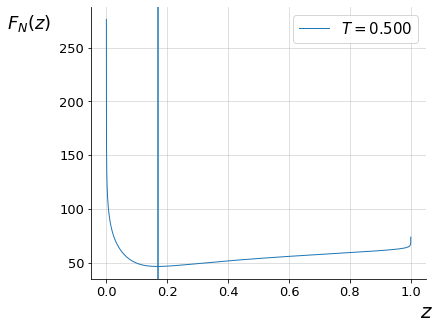

In [13]:
# plotting "Potential landscape"

mvals = 100000 # number of points to plot
ztest = np.linspace(0.000001, 0.999999, mvals) # values to evaluate potential

# figure
plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
linestyle_list = list(lines.lineStyles.keys())

T = 0.5

if type(T) == float:
    Tlist = [T]
else:
    Tlist = T

# Plotting function for three temperature values
Fvals_dict = dict() # empty dictionary of F values
for i in range(len(Tlist)):
    Fvals_dict[i] = np.zeros(mvals)
    for k in range(mvals):
        Fvals_dict[i][k] = KP_test.potential(z= ztest[k], T = Tlist[i])
#         Fvals_dict[i][k] = KP_test.constraint(z= ztest[k], T = Tlist[i])
    ax.plot(ztest, Fvals_dict[i], label = r'$T = %.3f$' % Tlist[i], linestyle = linestyle_list[i], linewidth = 1.0)

z_res = fmin(KP_test.potential, x0=1e-8, args = (T,), disp=False)[0]
z_res2 = fsolve(KP_test.constraint, x0=1e-8, args = (T,))[0]


# plot sides
plt.xlabel(r'$z$', fontsize = 20, x = 1.0)
plt.xticks(fontsize=13 )
plt.ylabel(r'$F_N(z)$', fontsize = 18, rotation = 0, labelpad = 30, y = 0.9)
plt.yticks(fontsize= 13)
plt.axvline(x = z_res)
# plt.xlim(-.0001, 0.00015)
# plt.ylim(-.05, .05)
plt.grid(alpha = 0.5)
plt.legend(loc = 'best', fontsize = 15)

print(z_res)
print(10*3*np.exp(3/T)/(z_res**(-3) + np.exp(3/T)))

plt.show()

In [135]:
Tsolve = lambda T, z: -KP_test.limit+ z/(1-z) + np.sum(KP_test.weights*z**(KP_test.weights)/(np.exp(-KP_test.values/T) +z**(KP_test.weights)))

In [4]:
zaim = 1/2
fsolve(Tsolve, x0=.205, args = (zaim,))[0]

NameError: name 'Tsolve' is not defined

In [138]:
zaim**(1000)

0.0

In [103]:
zaim**(-KP_test.weights)*np.exp(-KP_test.values/T)

array([7.00520861e-20, 7.00520861e-20, 7.00520861e-20, 7.00520861e-20,
       7.00520861e-20, 7.00520861e-20, 7.00520861e-20, 7.00520861e-20,
       7.00520861e-20, 7.00520861e-20])

In [92]:
z_res

2.593750000000007e-09

In [93]:
np.exp(3/T)/(z_res**(-3) + np.exp(3/T))

0.6658593843125693

In [6]:
weight_vec

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [55]:
Tval = 0.275
KP_vals = list()
x_vals = np.linspace(0.001, 0.999, 300)
for zval in x_vals:
    result = KP_camping.constraint(zval, Tval)
    KP_vals.append(result)

/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:203: RuntimeWarning: overflow encountered in power
  return -self.limit+ z/(1-z) + np.sum(self.weights/(z**(-self.weights)*np.exp(-self.values/T) +1))


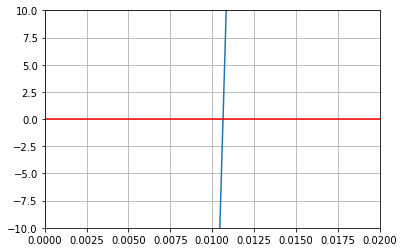

In [59]:
import matplotlib.pyplot as plt
plt.plot(x_vals, KP_vals)
plt.axhline(y=0, color = 'r')
plt.xlim(0,.02)
plt.ylim(-10,10)
plt.grid()

In [5]:
KP_camping.plot_constraint(T = 0.63)

/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:203: RuntimeWarning: overflow encountered in power
  return -self.limit+ z/(1-z) + np.sum(self.weights/(z**(-self.weights)*np.exp(-self.values/T) +1))


ValueError: 

^
Double subscript  (at char 0), (line:1, col:1)

<Figure size 432x360 with 1 Axes>

### Plotting Temperature Dependence of Value

/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:199: RuntimeWarning: invalid value encountered in log
  return - self.limit*np.log(z)-np.log(1-z) + np.sum(np.log(1+z**(self.weights)*np.exp(self.values/T)))


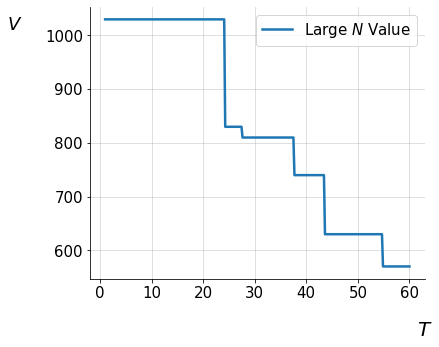

In [5]:
KP_camping.plot_value_vs_temp(temp_low=1.0, temp_high = 60.0)

### Algorithm Comparison

In [6]:
from tabulate import tabulate
from collections import defaultdict

import time

In [7]:
# dictionary of algorithm names and functions
algo_name_dict = {'Brute': KP_camping.brute_force,
                  'DP': KP_camping.knapsack01_dpV,
                  'FPTAS': KP_camping.fptas,
                  'Greedy': KP_camping.greedy,
                  'Annealing': KP_camping.simann_knapsack,
                  'Large N': KP_camping.largeN_algorithm}

# dictionary of algorithm names and results
results_name_dict = defaultdict(lambda: list())

for name, func in algo_name_dict.items():
    start_clock = time.time()
    soln  = func()
    
    # calculating values
    tot_value = str(round(np.dot(value_vec, soln), 0))
    tot_weight = str(round(np.dot(weight_vec, soln), 0))
    time_calc = str(round(time.time()-start_clock, 5)) 
    
    # assembling results
    results_name_dict[name] = [name, tot_value, tot_weight, time_calc]
    
# creating table of results
tabular_results = []
for k, v in results_name_dict.items():
    tabular_results.append(v) 

print(tabulate(tabular_results, ["Algorithm", "Value", "Weight ", "Time (sec)"], tablefmt="grid"))

Stopping annealing because error tolerance was reached
+-------------+---------+-----------+--------------+
| Algorithm   |   Value |   Weight  |   Time (sec) |
+=============+=========+===========+==============+
| Brute       |    1030 |       396 |     18.1333  |
+-------------+---------+-----------+--------------+
| DP          |    1030 |       396 |      0.00295 |
+-------------+---------+-----------+--------------+
| FPTAS       |    1030 |       396 |      0.00203 |
+-------------+---------+-----------+--------------+
| Greedy      |    1030 |       396 |      5e-05   |
+-------------+---------+-----------+--------------+
| Annealing   |     905 |       397 |      0.0646  |
+-------------+---------+-----------+--------------+
| Large N     |    1030 |       396 |      0.00075 |
+-------------+---------+-----------+--------------+


### Knapsack Variations: Bounded Version

In [2]:
items = (("map", 9, 150, 1),("compass", 13, 35, 1), ("water", 153, 200, 3),("sandwich", 50, 60, 2),
         ("glucose", 15, 60, 2),("tin", 68, 45, 3), ("banana", 27, 60, 3),("apple", 39, 40, 3),
            ("cheese", 23, 30, 1),("beer", 52, 10, 3),("suntan cream", 11, 70, 1),("camera", 32, 30, 1),
            ("t-shirt", 24, 15, 2),("trousers", 48, 10, 2),("umbrella", 73, 40, 1),("waterproof trousers", 42, 70, 1),
            ("waterproof overclothes", 43, 75, 1),("note-case", 22, 80, 1),("sunglasses", 7, 20, 1),("towel", 18, 12, 2),
            ("socks", 4, 50, 1),("book", 30, 10, 2),
           )

# defining weight and value vectors and weight limit
weight_vec = np.array([item[1] for item in items])
value_vec = np.array([item[2] for item in items])
bound_vec = np.array([item[3] for item in items])
Wlimit = 400

# defining instance of problem
KP_bounded = KnapsackProblem(weights = weight_vec, values = value_vec, limit = Wlimit, bounds = bound_vec)

In [3]:
soln = KP_bounded.largeN_algorithm(T = 4.10, threshold = 0.50)
print('Item: Item #')
print('-----------')
for k in range(len(soln)):
    if soln[k] == 1:
        print('%s : %i ' % (items[k][0], items[k][3]))
print()        
print('Total Value: %i' % (np.dot(soln, value_vec)))
print('Total Weight: %i' % (np.dot(soln, weight_vec)))

Item: Item #
-----------
map : 1 
compass : 1 
water : 3 
suntan cream : 1 
waterproof trousers : 1 
waterproof overclothes : 1 
note-case : 1 
sunglasses : 1 
socks : 1 

Total Value: 1050
Total Weight: 415


/Users/mobolajiwilliams/Dropbox/0Tex_Files_Mac/ipython_personal/2020_11_largeN_knapsack/largeNKP/KP.py:218: RuntimeWarning: overflow encountered in power
  return -self.limit+ z/(1-z) + np.sum(self.weights/(z**(-self.weights)*np.exp(-self.values/T) -1 )) - np.sum((self.bounds+1)*self.weights/(z**(-(self.bounds+1)*self.weights)*np.exp(-(self.bounds+1)*self.values/T) - 1))
